In [1]:
!pip install researchpy

Assumption check
Independent ttest
The distribution of the residuals between the two groups should follow the normal distribution.

A paired t-test is designed to compare the means of the same group or item under two separate scenarios. An unpaired t-test compares the means of two independent or unrelated groups. In an unpaired t-test, the variance between groups is assumed to be equal. In a paired t-test, the variance is not assumed to be equal

In [2]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import scale
from scipy import stats
import researchpy as rp

In [4]:
df = pd.read_csv(r'C:\\Contents\\Kaggle\\interpreting-data-using-statistical-models-python\\02\\demos\datasets\\bike_sharing_data_processed.csv')
df.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt
0,1,1,0,0,2,0.344167,985
1,1,1,0,0,2,0.363478,801
2,1,1,0,1,1,0.196364,1349
3,1,1,0,1,1,0.200000,1562
4,1,1,0,1,1,0.226957,1600


In [5]:
df['season'].unique()

array([1, 2, 3, 4], dtype=int64)

In [6]:
df['mnth'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [7]:
df['holiday'].unique()

array([0, 1], dtype=int64)

In [8]:
df['workingday'].unique()

array([0, 1], dtype=int64)

In [9]:
df['weathersit'].unique()

array([2, 1, 3], dtype=int64)

In [10]:
df['temp'].describe()

count    731.000000
mean       0.495385
std        0.183051
min        0.059130
25%        0.337083
50%        0.498333
75%        0.655417
max        0.861667
Name: temp, dtype: float64

In [11]:
df.groupby('workingday')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,231.0,4330.168831,2052.141245,605.0,2710.50,4459.0,5907.5,8714.0
1,500.0,4584.820000,1878.415583,22.0,3344.25,4582.0,5987.5,8362.0


In [12]:
df.groupby('weathersit')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
weathersit,,,,,,,,
1,463.0,4876.786177,1879.483989,431.0,3636.5,4844.0,6458.5,8714.0
2,247.0,4035.862348,1809.109918,605.0,2674.5,4040.0,5257.5,8362.0
3,21.0,1803.285714,1240.284449,22.0,705.0,1817.0,2424.0,4639.0


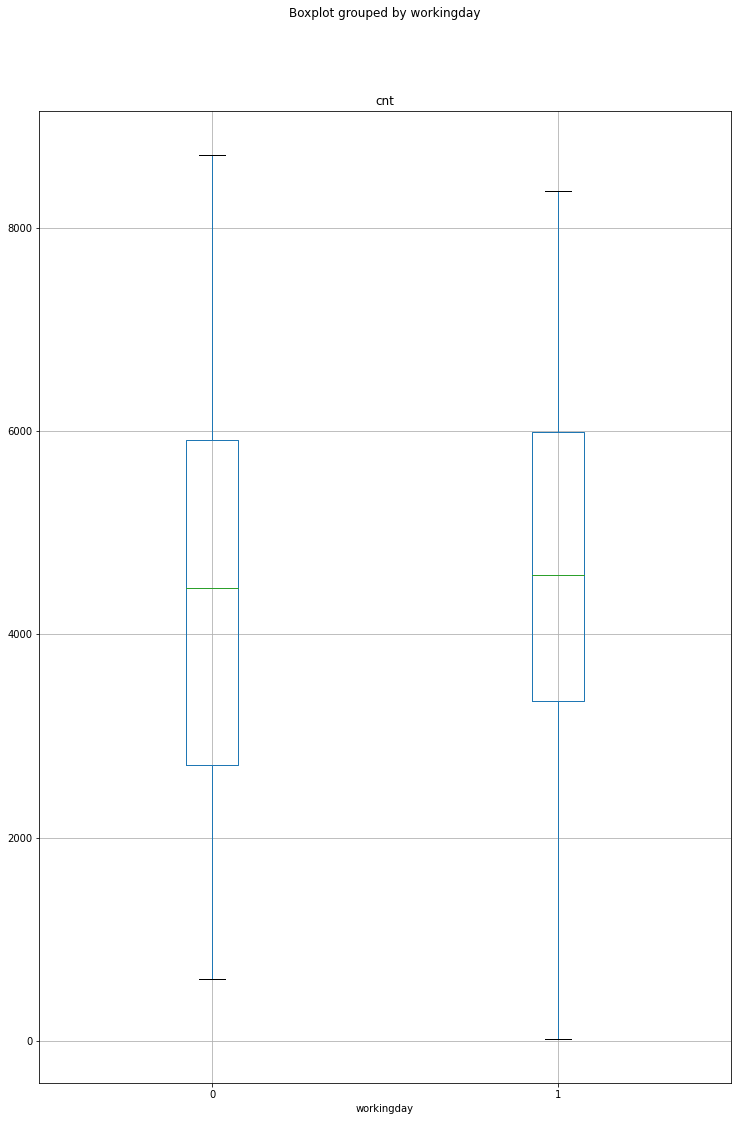

In [14]:
df.boxplot(column=['cnt'], by='workingday', figsize=(12,18))

In [15]:
sample0 = df[df['workingday']==0]
sample1 = df[df['workingday']==1]

In [16]:
sample0.shape, sample1.shape

((231, 7), (500, 7))

In [18]:
#Null hypothesis -> sample0 mean is same as sample1 mean
#Alt hypothesis -> sample0 mean is not equal to sample1 mean
sample1 = sample1.sample(231)

sample0.shape, sample1.shape

((231, 7), (231, 7))

In [20]:
## t-statistic
## Score which indicates the difference in means 

stats.ttest_ind(sample0['cnt'], sample1['cnt'])

Ttest_indResult(statistic=-1.1440625301761713, pvalue=0.25319268409335766)

(array([ 5., 23., 25., 50., 39., 31., 30., 15., 10.,  3.]),
 array([-2.22061633, -1.72648573, -1.23235513, -0.73822454, -0.24409394,
         0.25003666,  0.74416725,  1.23829785,  1.73242845,  2.22655905,
         2.72068964]),
 <a list of 10 Patch objects>)

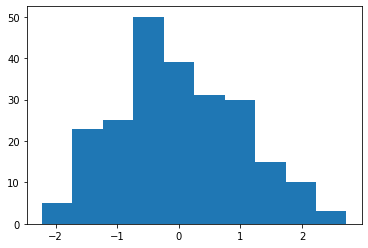

In [22]:
import numpy as np

diff = scale(np.array(sample0['cnt']) - np.array(sample1['cnt'], dtype=np.float))

plt.hist(diff)

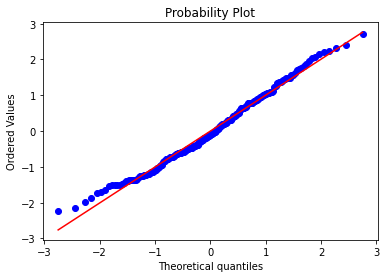

In [23]:
stats.probplot(diff, plot=plt, dist = 'norm')
plt.show()

In [24]:
df['temp_category'] = df['temp'] > df['temp'].mean()

In [25]:
df.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt,temp_category
0,1,1,0,0,2,0.344167,985,False
1,1,1,0,0,2,0.363478,801,False
2,1,1,0,1,1,0.196364,1349,False
3,1,1,0,1,1,0.200000,1562,False
4,1,1,0,1,1,0.226957,1600,False


In [26]:
sample0 = df[df['temp_category'] == False]
sample1 = df[df['temp_category'] == True]

In [27]:
sample0.shape, sample1.shape

((364, 8), (367, 8))

In [28]:
df.groupby('temp_category')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
temp_category,,,,,,,,
False,364.0,3387.664835,1691.340133,22.0,1964.5,3301.0,4513.5,8090.0
True,367.0,5611.904632,1475.698228,1115.0,4548.5,5336.0,6897.5,8714.0


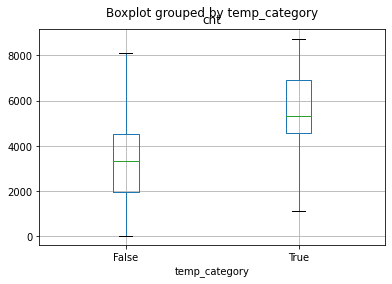

In [29]:
df.boxplot(column = ['cnt'], by='temp_category')

In [30]:
sample1 = sample1.sample(len(sample0))
sample1.shape

(364, 8)

(array([ 3., 11., 25., 40., 66., 72., 67., 53., 17., 10.]),
 array([-2.90850058, -2.37521553, -1.84193049, -1.30864544, -0.77536039,
        -0.24207534,  0.2912097 ,  0.82449475,  1.3577798 ,  1.89106485,
         2.42434989]),
 <a list of 10 Patch objects>)

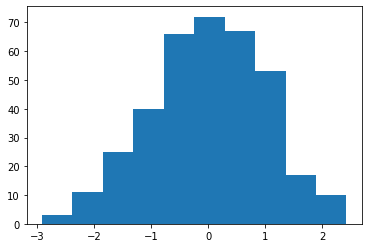

In [33]:
diff = scale(np.array(sample1['cnt']) - np.array(sample0['cnt']))
plt.hist(diff)

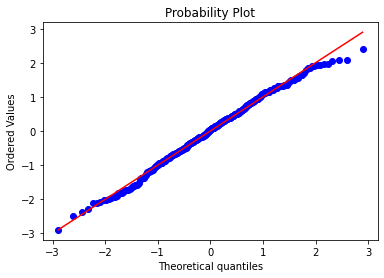

In [36]:
stats.probplot(diff, plot=plt, dist='norm')
plt.show()

In [37]:
stats.ttest_ind(sample0['cnt'], sample1['cnt'])

Ttest_indResult(statistic=-18.93487527073984, pvalue=2.7406691931027124e-65)

In [42]:
mu=0
sigma = 1
n= 10000
x = np.random.normal(mu,sigma,n)

((array([-3.81060943, -3.58545756, -3.46184782, ...,  3.46184782,
          3.58545756,  3.81060943]),
  array([-3.74857999, -3.68909851, -3.51630464, ...,  3.3837856 ,
          3.71507803,  3.89530891])),
 (1.00250756852807, 0.010911357398780954, 0.9999293277688732))

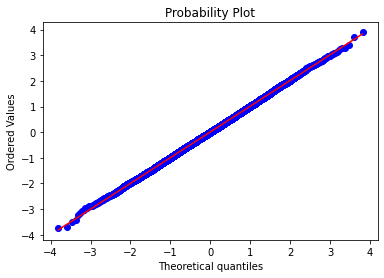

In [45]:
stats.probplot(x, plot=plt, dist='norm')